# Загрузка библиотек

In [2]:
%run -i "D:/Data_Science/Projects/PIK/import_lib.ipynb"
seed = 42

PATH = "D:/Data_Science/SCREENS/"

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Чтение данных

In [79]:
train = pd.read_csv("input/train.csv", parse_dates=["date1"], dayfirst=True)
test = pd.read_csv("input/test.csv", parse_dates=["date1"], dayfirst=True)

# ../input/m_train_small.csv


# data = pd.read_csv("data.csv", parse_dates=["date1"], dayfirst=True)

# df_list=[]
# for line in open("status.csv", "r"):
#     line = line.replace('"', '').strip()
#     df_list.append(line)
# status = pd.read_csv(io.StringIO('\n'.join(df_list)))

# status.head()

In [84]:
# если нет целевой переменной в тесте
test['value'] = np.nan

In [85]:
# join train & test
df = pd.concat([train,test])
print(df.shape)
df.head()

(10486, 56)


,Cтавка по ипотеке,bulk_id,date1,id,mean_fl,mean_sq,month,month_cnt,plan_l,plan_m,plan_s,price,spalen,start_square,value,vid_0,vid_1,vid_2,Автомойка,Вентлияция,Видеонаблюдение,Вклады до 1 года,Вклады от 1 года до 3 лет,Вклады свыше 3 лет,Входные группы,Двор без машин,Детский сад,До Кремля,До Садового(км),До ТТК(км),До большой дороги на машине(км),До метро пешком(км),До парка пешком(км),До парка(км),До промки(км),До удобной авторазвязки на машине(км),Кладовые,Класс объекта,Количество помещений,Колясочные,Кондиционирование,Курс,Лифт,Машиномест,Огорожена территория,Площадь двора,Площадь зеленой зоны в радиусе 500 м,Площадь земельного участка,Площадь пром. зоны в радиусе 500 м,Подземная парковка,Поликлиника,Система мусоротведения,Спортивная площадка,Станций метро от кольца,ФОК,Школа
0,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,0,8,38.00,10,34,0.0,198.0,147.0,135633.913043,1,13109.9,1124.5,0.0,169.0,176.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
1,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,1,9,58.01,10,34,83.0,120.0,139.0,128492.419825,2,19898.4,1412.3,30.0,136.0,177.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
2,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,2,10,22.58,10,34,0.0,15.0,78.0,158237.634409,0,2100.0,345.0,0.0,73.0,20.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
3,10.04,FF3814A9-9F7D-E711-8530-00505688958B,2017-10-01,3,8,78.81,10,34,72.0,0.0,50.0,123250.000000,3,9614.9,769.4,0.0,30.0,92.0,нет,1,0,5.74,5.94,6.03,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,57.698052,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825
4,9.87,FF3814A9-9F7D-E711-8530-00505688958B,2017-11-01,4,9,37.93,11,35,0.0,175.0,140.0,139420.634921,1,11947.2,526.7,0.0,145.0,170.0,нет,1,0,5.17,7.07,6.20,да,да,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,да,эконом,1983,да,1,58.926552,1,1800,нет,7640.0,25533.0,17.0,65357.0,да,0,контейнеры,да,8.0,0,825


## Feature engineering

### xgbfir

In [ ]:
params = {
    
    'objective': 'reg:linear',
    'booster': 'gbtree',
    'scale_pos_weight': 1,
    
    'colsample_bytree': 0.8,
    'subsample': 0.8
    
    'learning_rate': 0.05,
    'n_estimators': 500,
    
    'max_depth': 7,
    'min_child_weight': 1,

    'random_state': seed,
    
    'reg_alpha': 0,
    'reg_lambda': 1,
}

xgb_rmodel = xgb.XGBRegressor(**params).fit(X_train, y_train)

xgbfir.saveXgbFI(xgb_rmodel, feature_names=X_train.columns, OutputXlsxFile = 'FI.xlsx')

### count

In [108]:
pd.DataFrame(df.nunique().sort_values(ascending=False), columns=["count"])

,count
price,8300
value,4675
mean_sq,4241
bulk_id,259
green_sq_500,188
prom_sq_500,140
dvor_sq,131
to_big_road,106
to_park,99
to_park_foot,93


### логарифмирование

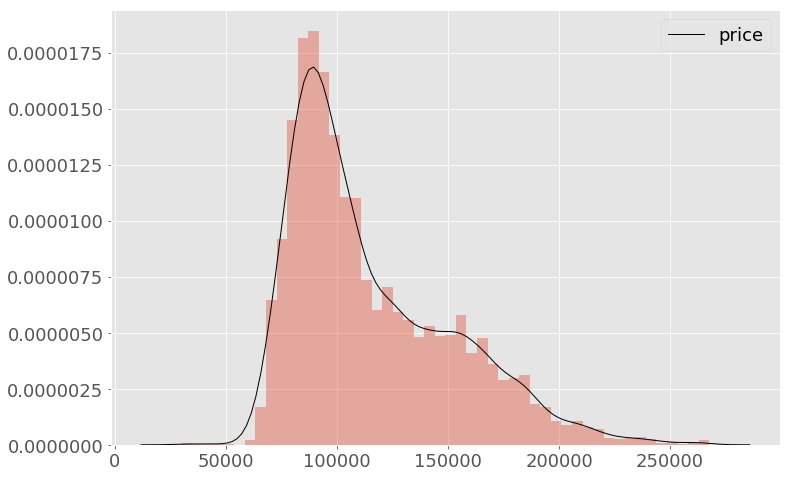

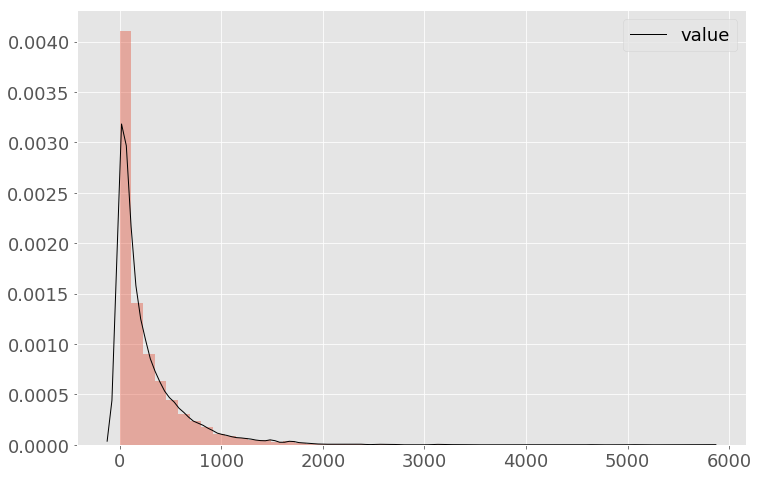

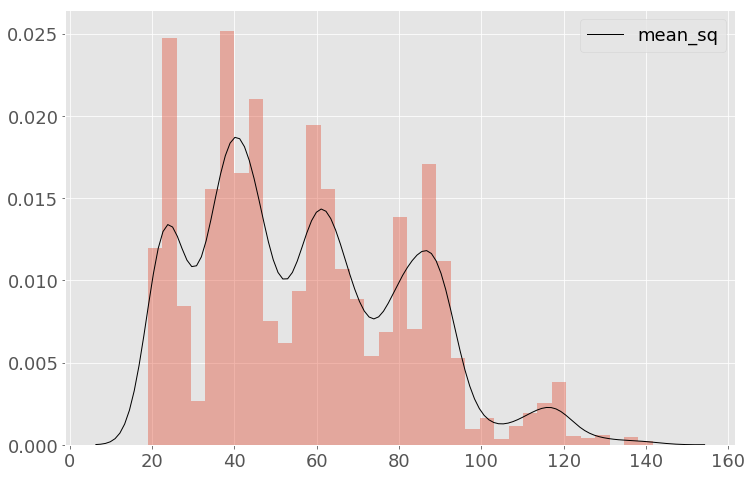

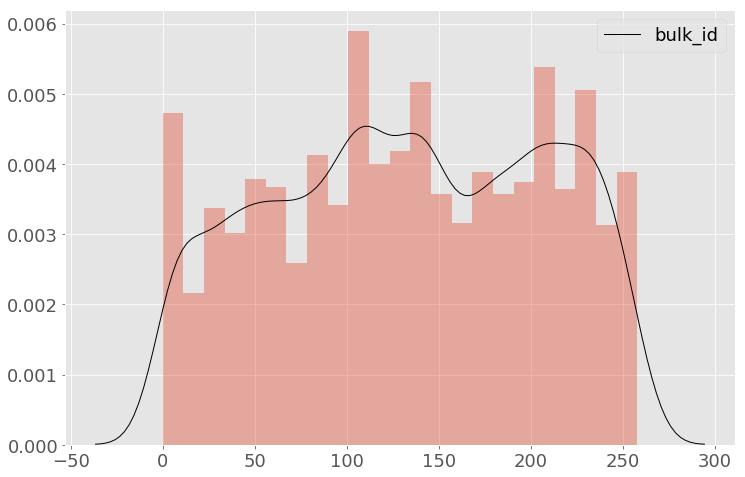

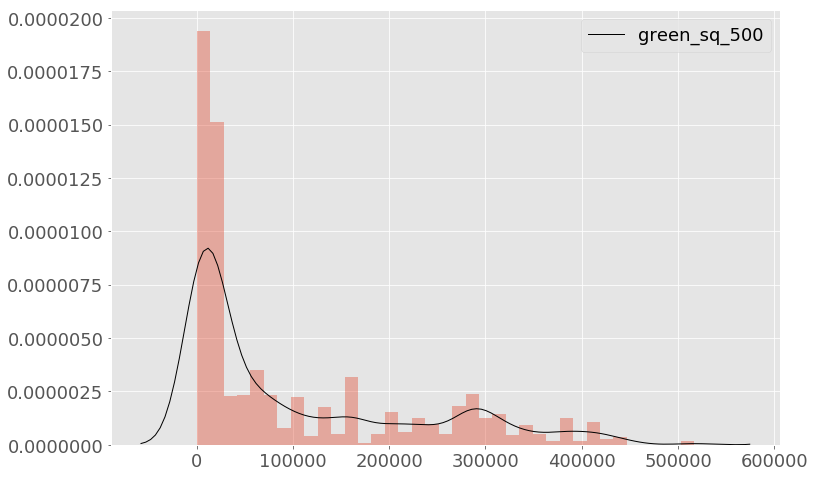

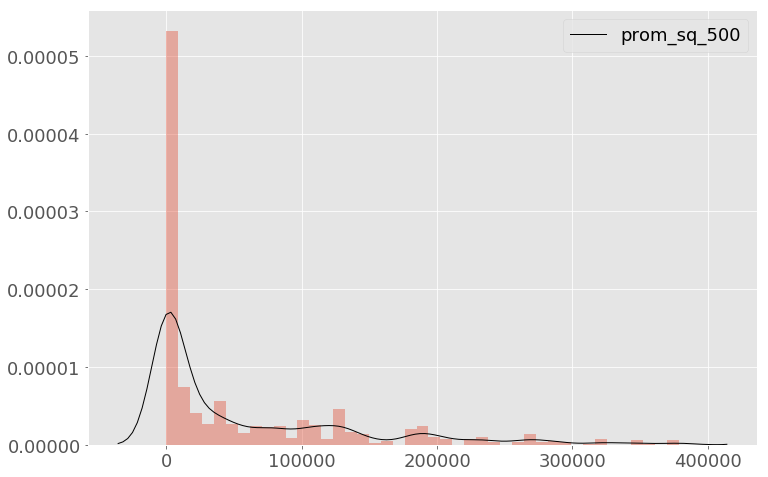

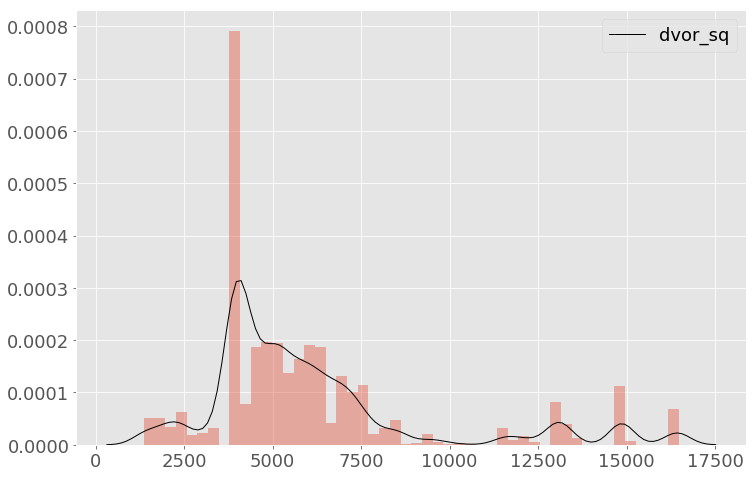

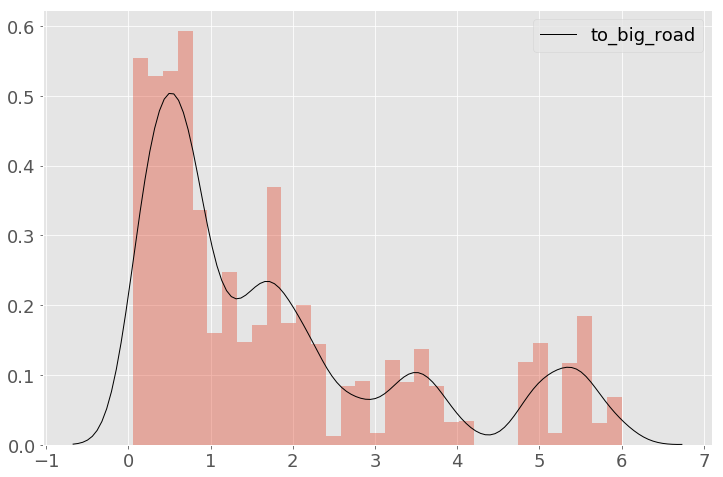

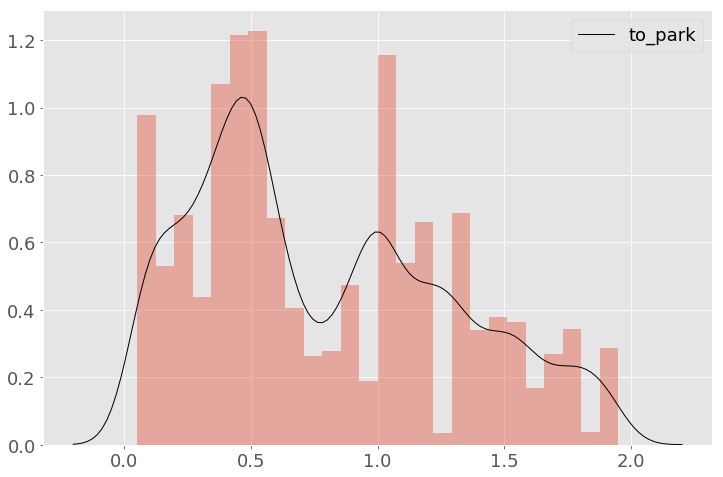

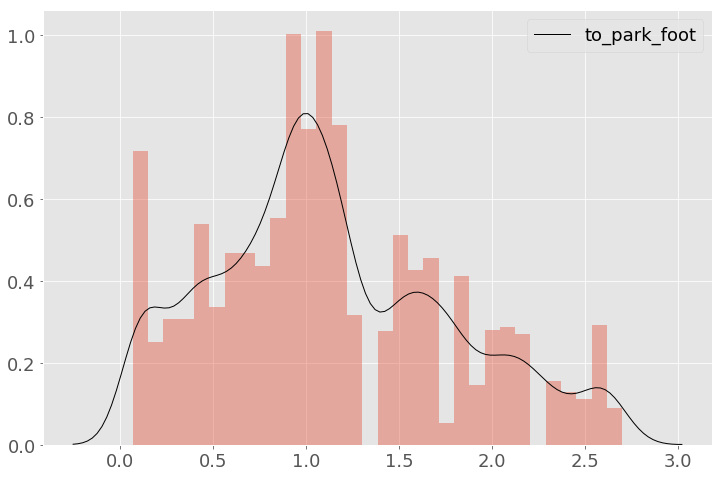

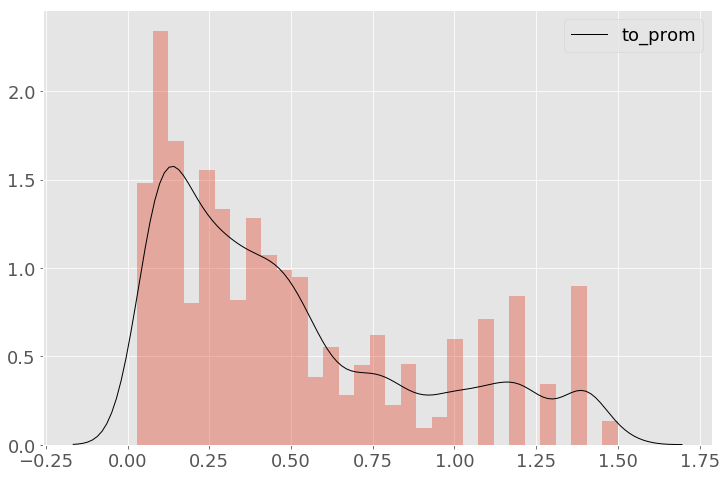

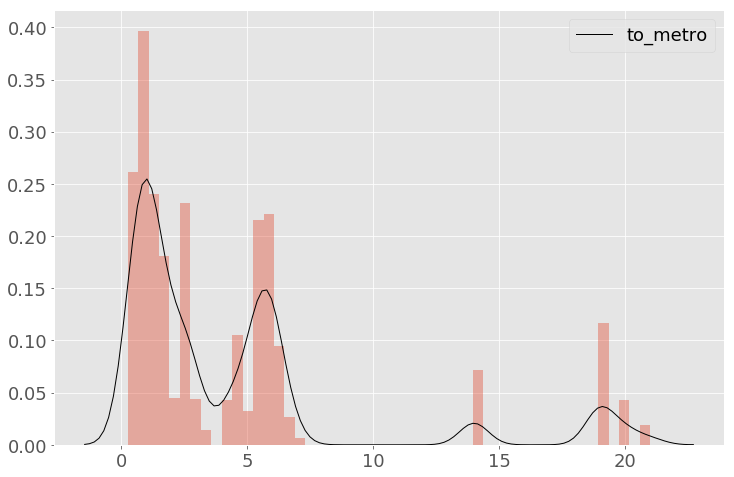

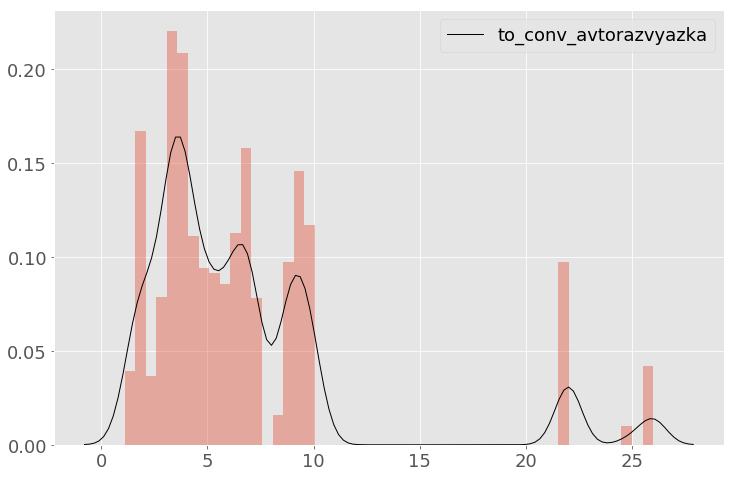

In [111]:
val_cnt_df = pd.DataFrame(df.nunique().sort_values(ascending=False), columns=["count"])
val_cnt_df = val_cnt_df.where(lambda x : x >= 80).dropna()
many_val = list(val_cnt_df.index)
many_val
    
for i, col in enumerate(df[many_val].columns):
    plt.figure(i)
    sns.distplot(df[[col]].dropna(), kde_kws={"color": "k", "lw": 1, "label": col})

In [113]:
df["log_price"] = pd.Series(np.log(df["price"]+1))

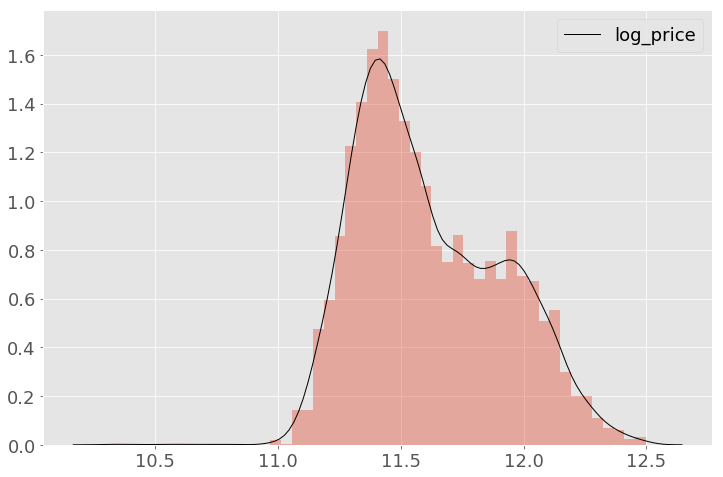

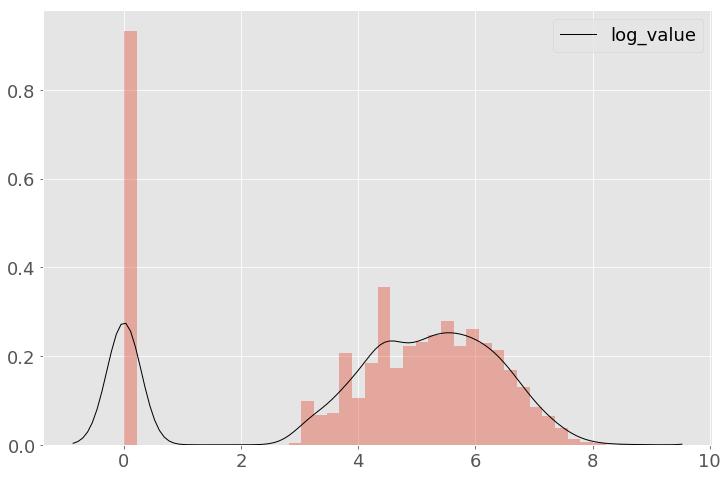

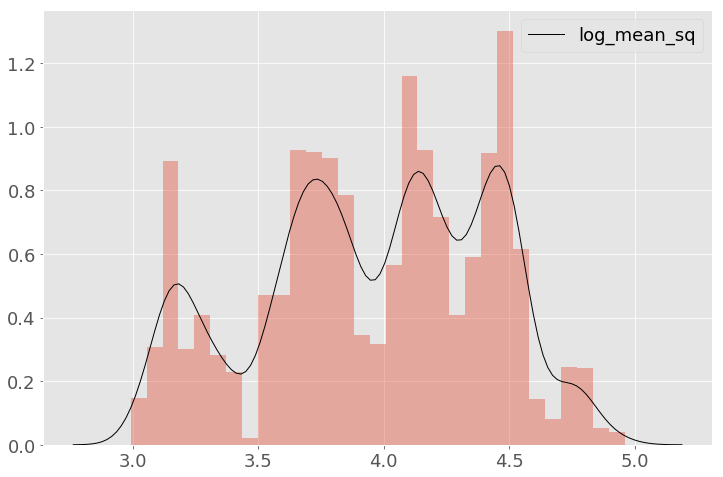

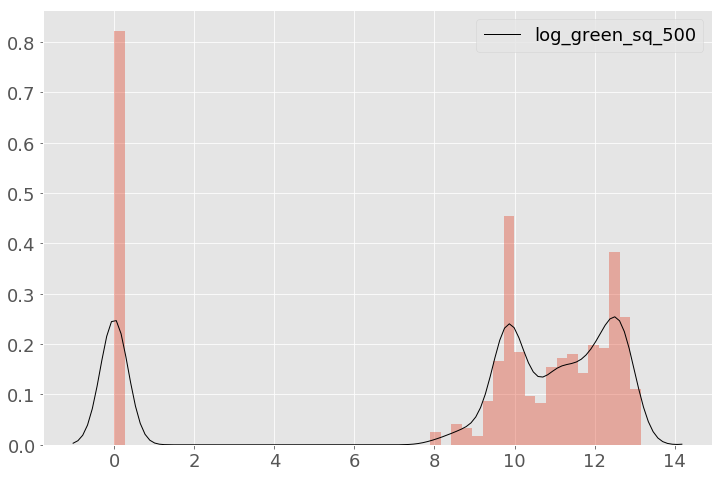

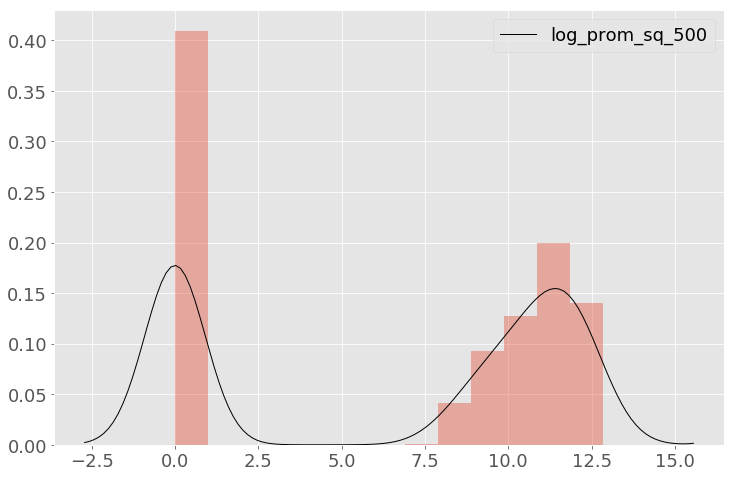

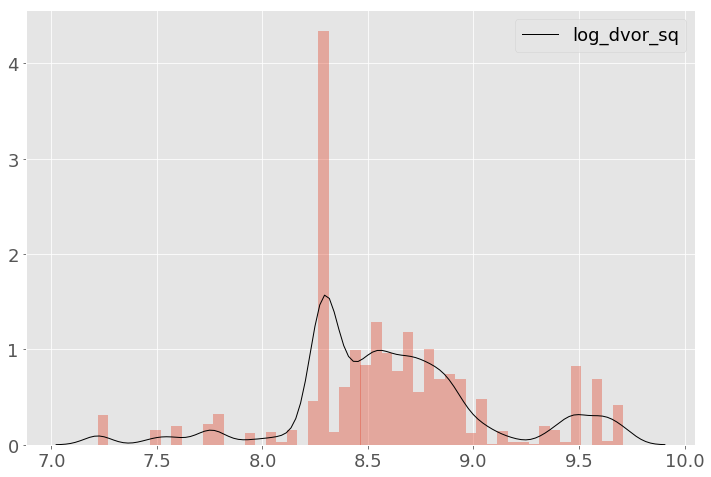

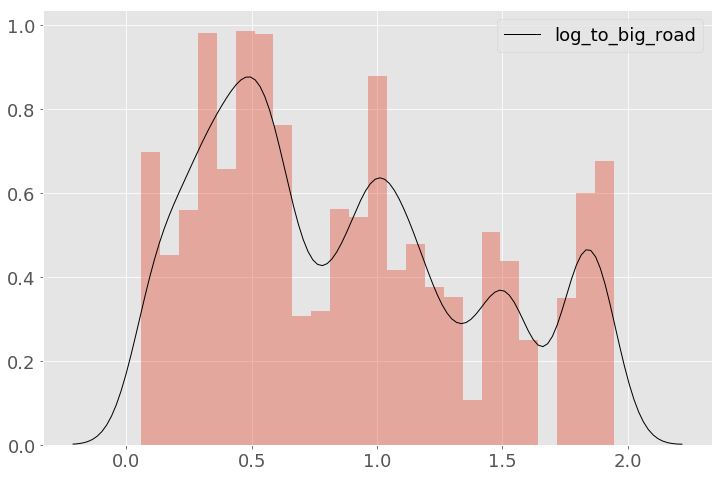

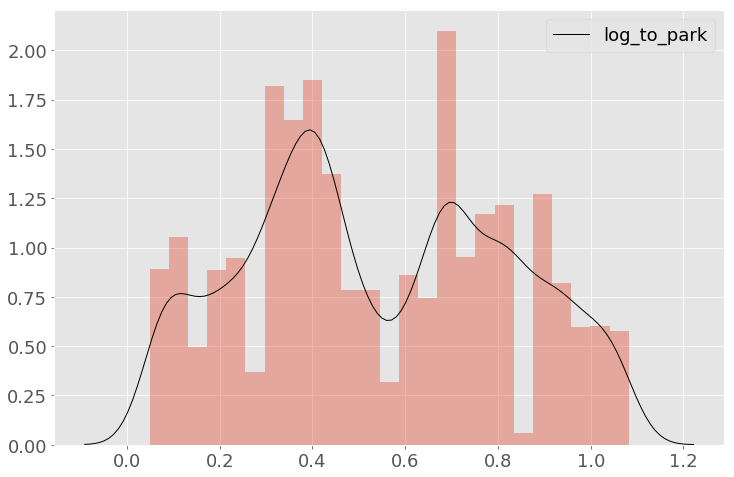

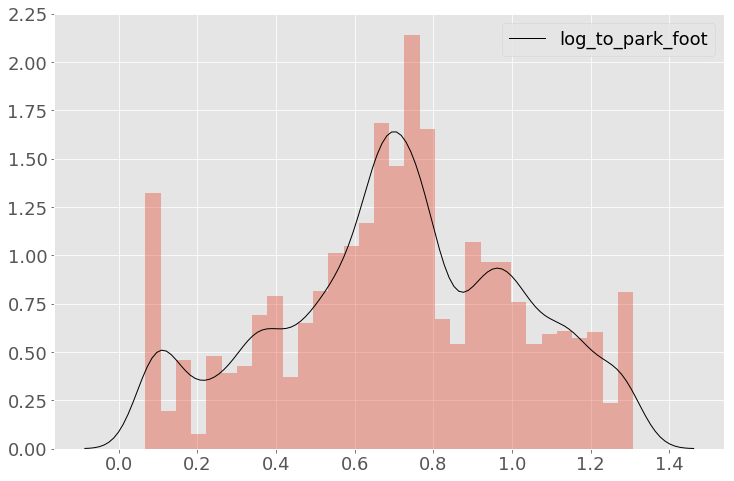

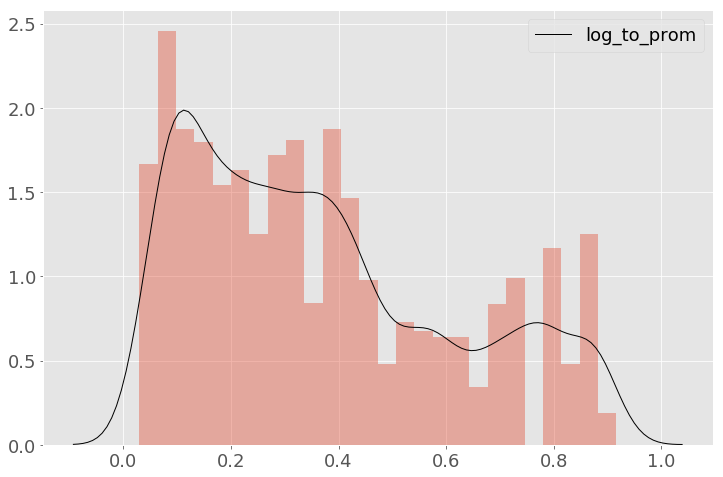

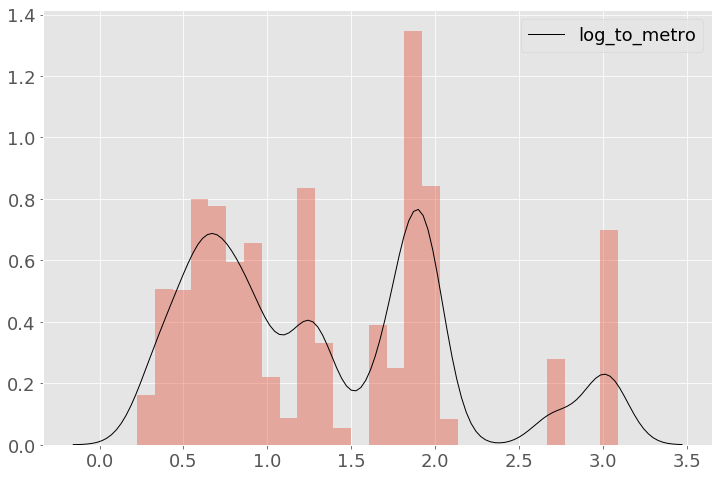

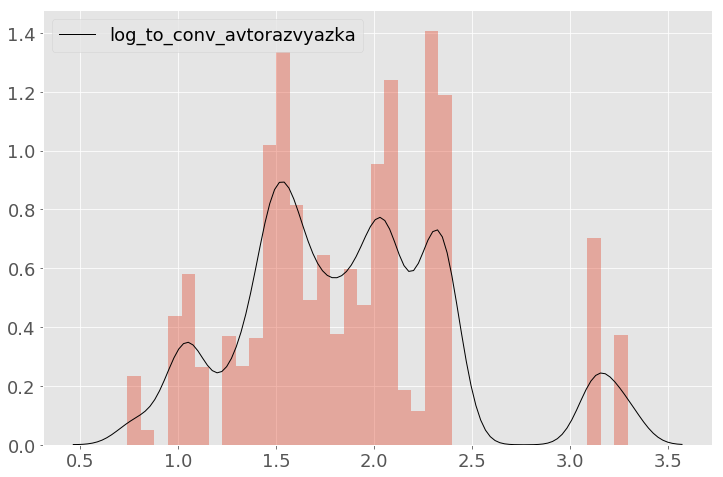

In [114]:
log_col = [col for col in df if ((col.startswith("log_")))]

for i, col in enumerate(df[log_col].columns):
    plt.figure(i)
    sns.distplot(df[[col]].dropna(), kde_kws={"color": "k", "lw": 1, "label": col})

### сочетания признаков

#### группировка

In [118]:
distance_col = df.loc[:,"to_cremlin":"to_conv_avtorazvyazka"].columns

#### произведение

In [120]:
df["ipoteka_on_course"] = df["ipoteka"]*df["course"]

#### отношение

In [121]:
df["price_to_spalen"] = df["price"] / df["spalen"]

#### сумма

In [123]:
df["total_dist"] = df[distance_col].sum(axis=1)

df["school_plus_det_sad"] = df["school"] + df["det_sad"]

#### разность

In [124]:
df["month_minus_month_cnt"] = df["month_cnt"] - df["month"]

### группировка

In [125]:
# # without year

# l = ["log_price", "log_mean_sq", "log_value"]

# for i in l:
#     foo = str(i)+"_mean_target"
#     group_df = train.groupby(["bulk_id", "spalen"])[i].mean()
#     group_df = group_df.unstack(level=1)
#     group_df.fillna(group_df.mean(), inplace=True)
#     for j in range(0, 260):
#         if j not in group_df.index:
#             group_df.loc[j] = [np.nan, np.nan, np.nan, np.nan, np.nan] 
#     group_df.fillna(group_df.mean(), inplace=True)

#     exec(foo + ' = group_df')
    
#     def agg_fun(row):
#         bulk = row["bulk_id"]
#         spalen = row["spalen"]
#         return group_df.iloc[int(bulk)][int(spalen)]
    
#     df[str(i)+"_mean_target"] = df.apply(lambda row: agg_fun(row), axis=1)

In [126]:
# for i in l:
#     cumsum = df.iloc[0:X_train.shape[0]].groupby(["bulk_id", "spalen"])[i].cumsum() - df.iloc[0:X_train.shape[0]][i]
#     cumcnt = df.iloc[0:X_train.shape[0]].groupby(["bulk_id", "spalen"])[i].cumcount()
#     df.iloc[0:X_train.shape[0], df.columns.get_loc(str(i)+"_mean_target")] = cumsum/(cumcnt+1)

In [127]:
# df.head()

In [128]:
# # without year

# l = ["log_price", "log_mean_sq", "log_value"]

# for i in l:
#     foo = str(i)+"_bulk_spalen_g_avg"
#     group_df = df.groupby(["bulk_id", "spalen"])[i].mean()
#     exec(foo + ' = group_df')
    
#     def agg_fun(row):
#         bulk = row["bulk_id"]
#         spalen = row["spalen"]
#         return group_df[bulk][spalen]
    
#     df["avg_"+str(i)+"_bulk_spalen_g"] = df.apply(lambda row: agg_fun(row), axis=1)

    
# for i in l:
#     foo = str(i)+"_bulk_spalen_g_max"
#     group_df = df.groupby(["bulk_id", "spalen"])[i].max()
#     exec(foo + ' = group_df')
    
#     def agg_fun(row):
#         bulk = row["bulk_id"]
#         spalen = row["spalen"]
#         return group_df[bulk][spalen]
    
#     df["max_"+str(i)+"_bulk_spalen_g"] = df.apply(lambda row: agg_fun(row), axis=1)
    
    
# for i in l:
#     foo = str(i)+"_bulk_spalen_g_min"
#     group_df = df.groupby(["bulk_id", "spalen"])[i].min()
#     exec(foo + ' = group_df')
    
#     def agg_fun(row):
#         bulk = row["bulk_id"]
#         spalen = row["spalen"]
#         return group_df[bulk][spalen]
    
#     df["min_"+str(i)+"_bulk_spalen_g"] = df.apply(lambda row: agg_fun(row), axis=1)

### итог

In [130]:
# вставить в начало таблицы следующие столбцы:
inserted_cols = ['date', 'bulk_id', 'spalen', 'mean_sq', 'price', 'log_value']
cols = ([col for col in inserted_cols if col in df] 
        + [col for col in df if col not in inserted_cols])
df = df[cols]

In [131]:
print(df.shape)
df.tail(15)

(10486, 96)


,bulk_id,spalen,mean_sq,price,log_value,ipoteka,mean_fl,month,month_cnt,avtomoika,dep_1,dep_1_3,dep_3,input_groups,dvor_no_car,det_sad,to_cremlin,to_sadoviy,to_ttk,to_big_road,to_metro,to_park_foot,to_park,to_prom,to_conv_avtorazvyazka,kladovie,num_pomesh,kolyas,course,mashinomest,ogorozh_ter,dvor_sq,green_sq_500,zem_sq,prom_sq_500,parking_under,station_num_koltso,fok,school,poliklinnika_0,poliklinnika_500,poliklinnika_510,poliklinnika_600,object_class_0,object_class_1,object_class_2,video_0,video_1,video_2,vent_0,vent_1,vent_2,cond_0,cond_1,cond_3,spalen_0,spalen_1,spalen_2,spalen_3,spalen_4,year,quarter,log_price,log_mean_sq,log_green_sq_500,log_prom_sq_500,log_dvor_sq,log_to_big_road,log_to_park,log_to_park_foot,log_to_prom,log_to_metro,log_to_conv_avtorazvyazka,ipoteka_on_course,mean_sq_sq,mean_fl_on_mean_sq,mean_fl_on_spalen,price_to_spalen,log_price_to_spalen,mean_sq_to_spalen,log_mean_sq_to_spalen,price_to_mean_sq,log_price_to_log_mean_sq,mean_sq_to_mean_fl,total_dist,total_dist_log,max_dist,max_dist_log,school_plus_det_sad,month_minus_month_cnt,ipoteka_minus_dep_1,ipoteka_minus_dep_1_3,ipoteka_minus_dep_3,dep_3_minus_dep1,dep_3_minus_dep1_3,dep_1_3_minus_dep1
1139,254,4,118.50,77150.000000,NaN,9.59,2,4,40,1,5.25,6.25,5.35,0,0,470,38.0,36.0,33.0,0.75,20.0,1.00,0.70,0.47,26.0,0,4548,0,60.769891,3500,1,3428.0,83047.0,50.00,0.0,1,9.0,0,1100,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,2018,2,11.253520,4.783316,11.327174,0.000000,8.140024,0.559616,0.530628,0.693147,0.385262,3.044522,3.295837,582.78325,14042.2500,237.00,8,15430.000000,2.250704,23.700000,0.956663,651.054852,1.945859,59.250000,155.92,8.509013,38.0,3.295837,1570,36,4.34,3.34,4.24,0.1,-0.9,1.0
1593,255,0,21.17,140825.000000,NaN,9.59,10,4,40,1,5.25,6.25,5.35,0,0,450,25.0,23.0,20.0,5.30,2.9,1.40,1.10,1.10,8.8,0,1970,0,60.769891,7050,1,6209.0,17838.0,23.25,0.0,1,15.0,0,1100,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,2018,2,11.855280,3.098740,9.789142,0.000000,8.733916,1.840550,0.741937,0.875469,0.741937,1.360977,2.282382,582.78325,448.1689,211.70,0,140825.000000,11.855280,21.170000,3.098740,6652.102031,2.892421,2.117000,88.60,7.843252,25.0,2.282382,1550,36,4.34,3.34,4.24,0.1,-0.9,1.0
1594,255,1,38.77,115533.333333,NaN,9.59,4,4,40,1,5.25,6.25,5.35,0,0,450,25.0,23.0,20.0,5.30,2.9,1.40,1.10,1.10,8.8,0,1970,0,60.769891,7050,1,6209.0,17838.0,23.25,0.0,1,15.0,0,1100,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,2018,2,11.657323,3.683113,9.789142,0.000000,8.733916,1.840550,0.741937,0.875469,0.741937,1.360977,2.282382,582.78325,1503.1129,155.08,4,57766.666667,5.828662,19.385000,1.841556,2979.967329,2.489225,9.692500,88.60,7.843252,25.0,2.282382,1550,36,4.34,3.34,4.24,0.1,-0.9,1.0
1592,255,2,52.13,105456.034483,NaN,9.59,8,4,40,1,5.25,6.25,5.35,0,0,450,25.0,23.0,20.0,5.30,2.9,1.40,1.10,1.10,8.8,0,1970,0,60.769891,7050,1,6209.0,17838.0,23.25,0.0,1,15.0,0,1100,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,2018,2,11.566059,3.972742,9.789142,0.000000,8.733916,1.840550,0.741937,0.875469,0.741937,1.360977,2.282382,582.78325,2717.5369,417.04,16,35152.011494,3.855353,17.376667,1.324247,2022.943305,2.325892,6.516250,88.60,7.843252,25.0,2.282382,1550,36,4.34,3.34,4.24,0.1,-0.9,1.0
1595,255,3,68.20,97150.000000,NaN,9.59,2,4,40,1,5.25,6.25,5.35,0,0,450,25.0,23.0,20.0,5.30,2.9,1.40,1.10,1.10,8.8,0,1970,0,60.769891,7050,1,6209.0,17838.0,23.25,0.0,1,15.0,0,1100,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,2018,2,11.484022,4.237001,9.789142,0.000000,8.733916,1.840550,0.741937,0.875469,0.741937,1.360977,2.282382,582.78325,4651.2400,136.40,6,24287.500000,2.871005,17.050000,1.059250,1424.486804,2.192862,34.100000,88.60,7.843252,25.0,2.282382,1550,36,4.34,3.34,4.24,0.1,-0.9,1.0
1363,256,1,43.21,97012.962963,NaN,9.59,12,4,40,1,5.25,6.25,5.35,0,1,0,23.0,20.0,17.0,0.38,2.6,0.14,0.10,0.25,3.6,1,3000,1,60.769891,778,1,4000.0,189165.0,20.00,36176.0,0,12.0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,2018,2,11.482610,3.788951,12.150380,10.496179,8.294300,0.322083,0.095310,0.131028,0.223144,1.280934,1.526056,582.783

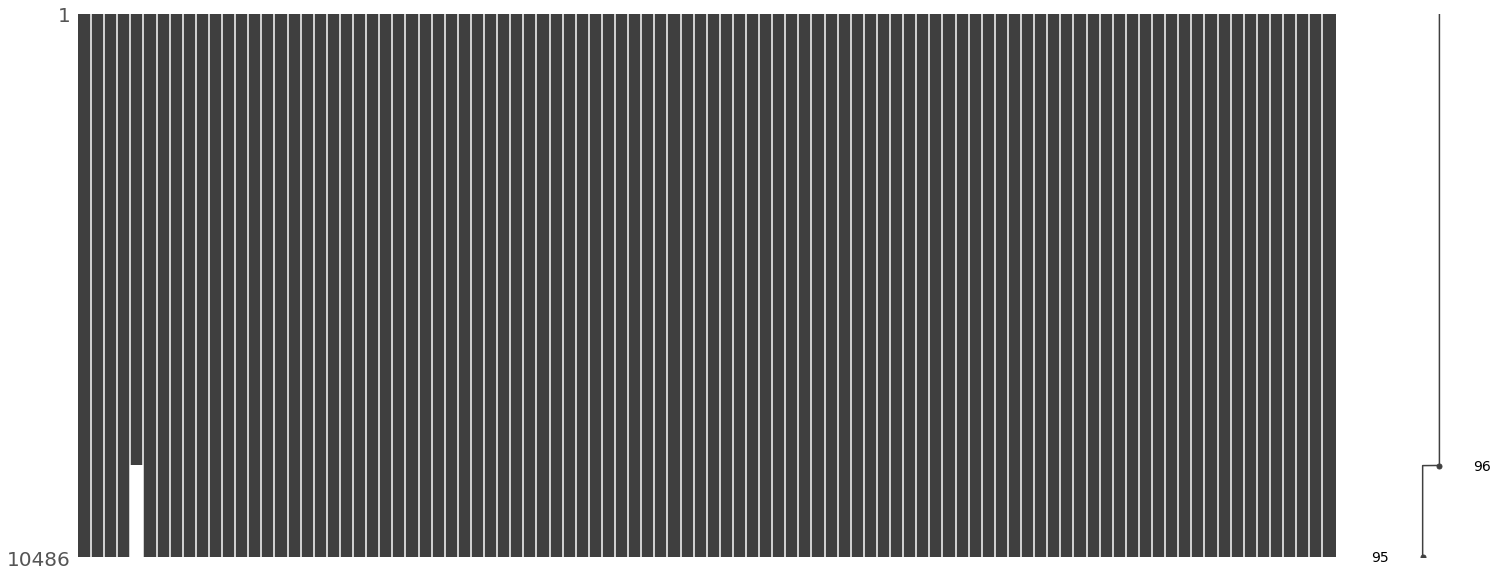

In [132]:
msno.matrix(df)#.iloc[:,-25:])

### kNN imputer

In [133]:
# df_imputed = pd.DataFrame(columns=df.columns)
# df_imputed = KNN(k=5).complete(df)
# df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
# df_imputed.head()

# train = df_imputed.iloc[0:8716,]
# test = df_imputed.iloc[8716:,]

# print(train.shape, test.shape)

In [134]:
train = df[df.log_value.notnull()]
test = df[df.log_value.isnull()]

print(train.shape, test.shape)

(8716, 96) (1770, 96)


In [135]:
train.to_csv("train_f.csv", index=False)
test.to_csv("test_f.csv", index=False)

In [136]:
train.tail()

,bulk_id,spalen,mean_sq,price,log_value,ipoteka,mean_fl,month,month_cnt,avtomoika,dep_1,dep_1_3,dep_3,input_groups,dvor_no_car,det_sad,to_cremlin,to_sadoviy,to_ttk,to_big_road,to_metro,to_park_foot,to_park,to_prom,to_conv_avtorazvyazka,kladovie,num_pomesh,kolyas,course,mashinomest,ogorozh_ter,dvor_sq,green_sq_500,zem_sq,prom_sq_500,parking_under,station_num_koltso,fok,school,poliklinnika_0,poliklinnika_500,poliklinnika_510,poliklinnika_600,object_class_0,object_class_1,object_class_2,video_0,video_1,video_2,vent_0,vent_1,vent_2,cond_0,cond_1,cond_3,spalen_0,spalen_1,spalen_2,spalen_3,spalen_4,year,quarter,log_price,log_mean_sq,log_green_sq_500,log_prom_sq_500,log_dvor_sq,log_to_big_road,log_to_park,log_to_park_foot,log_to_prom,log_to_metro,log_to_conv_avtorazvyazka,ipoteka_on_course,mean_sq_sq,mean_fl_on_mean_sq,mean_fl_on_spalen,price_to_spalen,log_price_to_spalen,mean_sq_to_spalen,log_mean_sq_to_spalen,price_to_mean_sq,log_price_to_log_mean_sq,mean_sq_to_mean_fl,total_dist,total_dist_log,max_dist,max_dist_log,school_plus_det_sad,month_minus_month_cnt,ipoteka_minus_dep_1,ipoteka_minus_dep_1_3,ipoteka_minus_dep_3,dep_3_minus_dep1,dep_3_minus_dep1_3,dep_1_3_minus_dep1
5003,257,2,44.92,101770.000000,4.860897,9.74,10,1,37,1,5.62,6.64,6.05,0,0,470,38.0,36.0,33.0,0.50,20.0,0.80,0.45,0.39,26.0,0,4548,0,56.4981,3500,1,4312.0,40858.0,50.0,43233.0,1,9.0,0,1100,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,2018,1,11.530480,3.826901,10.617882,10.674383,8.369389,0.405465,0.371564,0.587787,0.329304,3.044522,3.295837,550.291494,2017.8064,449.20,20,33923.333333,3.843493,14.973333,1.275634,2265.583259,2.388796,4.492000,155.14,8.034478,38.0,3.295837,1570,36,4.12,3.1,3.69,0.43,-0.59,1.02
14,258,0,22.94,167385.483871,4.996536,9.74,11,1,37,1,5.62,6.64,6.05,0,0,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,0,1983,0,56.4981,1800,1,7640.0,25533.0,17.0,65357.0,0,8.0,0,825,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,2018,1,12.028061,3.175551,10.147766,11.087635,8.941284,0.438255,0.457425,0.657520,0.246860,0.875469,0.993252,550.291494,526.2436,252.34,0,167385.483871,12.028061,22.940000,3.175551,7296.664511,2.880593,2.085455,51.44,3.668780,18.0,0.993252,1170,36,4.12,3.1,3.69,0.43,-0.59,1.02
12,258,1,37.96,144998.473282,6.895075,9.74,9,1,37,1,5.62,6.64,6.05,0,0,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,0,1983,0,56.4981,1800,1,7640.0,25533.0,17.0,65357.0,0,8.0,0,825,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,2018,1,11.884485,3.662535,10.147766,11.087635,8.941284,0.438255,0.457425,0.657520,0.246860,0.875469,0.993252,550.291494,1440.9616,341.64,9,72499.236641,5.942243,18.980000,1.831268,3819.770108,2.548932,4.217778,51.44,3.668780,18.0,0.993252,1170,36,4.12,3.1,3.69,0.43,-0.59,1.02
13,258,2,57.82,136632.733813,7.198856,9.74,9,1,37,1,5.62,6.64,6.05,0,0,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,0,1983,0,56.4981,1800,1,7640.0,25533.0,17.0,65357.0,0,8.0,0,825,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,2018,1,11.825059,4.074482,10.147766,11.087635,8.941284,0.438255,0.457425,0.657520,0.246860,0.875469,0.993252,550.291494,3343.1524,520.38,18,45544.244604,3.941686,19.273333,1.358161,2363.070457,2.330299,6.424444,51.44,3.668780,18.0,0.993252,1170,36,4.12,3.1,3.69,0.43,-0.59,1.02
15,258,3,79.25,132593.000000,6.424869,9.74,8,1,37,1,5.62,6.64,6.05,0,0,345,18.0,16.0,12.0,0.55,1.4,0.93,0.58,0.28,1.7,0,1983,0,56.4981,1800,1,7640.0,25533.0,17.0,65357.0,0,8.0,0,825,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,2018,1,11.795047,4.385147,10.147766,11.087635,8.941284,0.438255,0.457425,0.657520,0.246860,0.875469,0.993252,550.291494,6280.5625,634.00,24,33148.250000,2.948762,19.812500,1.096287,1673.097792,2.190293,9.906250,51.44,3.668780,18.0,0.993252,1170,36,4.12,3.1,3.69,0.43,-0.59,1.02


### distribution impute by category

In [ ]:
# guess_ages = np.zeros((2,3))

# for dataset in titanic:
#     for i in range(0, 2):
#         for j in range(0, 3):
#             guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

#             age_mean = guess_df.mean()
#             age_std = guess_df.std()
#             age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
#             #age_guess = guess_df.median()
            
#             guess_ages[i,j] = int(age_guess)
            
#     for i in range(0, 2):
#         for j in range(0, 3):
#             dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]

#     dataset['Age'] = dataset['Age'].astype(int)

### create categories from continuous variable

In [ ]:
# dataset['CategoricalAge'] = pd.cut(dataset['Age'], 5)
# dataset['CategoricalFare'] = pd.qcut(train['Fare'], 4) # qcut - равное число наблюдений в каждой группе (q - квантиль)

# # Mapping Age
# for dataset in titanic:  
#     dataset.loc[ dataset['Age'] <= 16, 'Age']                          = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4


# for dataset in titanic:
#     dataset['Title'] = dataset['Title'].replace(["Capt", "Col", "Major", "Dr", "Rev"], 'Officer')
#     dataset['Title'] = dataset['Title'].replace(["Jonkheer", "Don", "Sir", "the Countess", "Dona", "Lady"], 'Royalty')
#     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
#     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

### visualisation

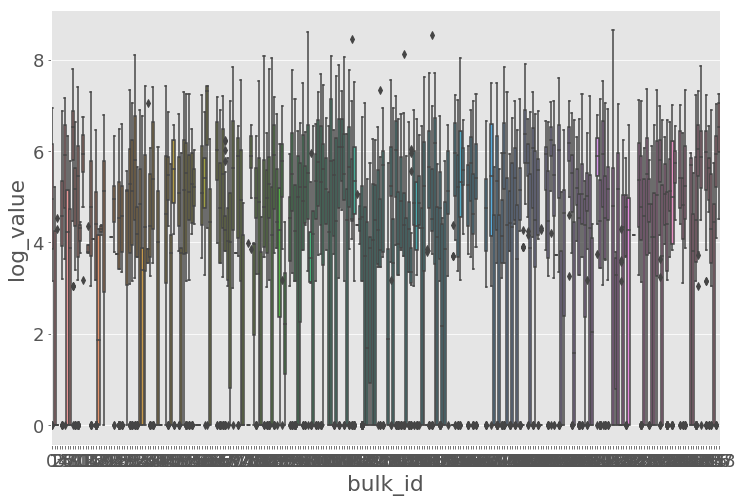

In [140]:
sns.boxplot(x="bulk_id",y="log_value", data=df)

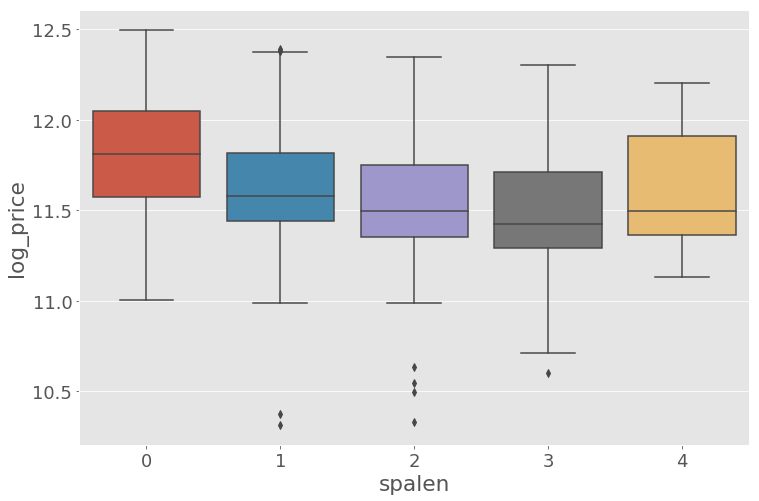

In [141]:
sns.boxplot(x="spalen",y="log_price", data=df)

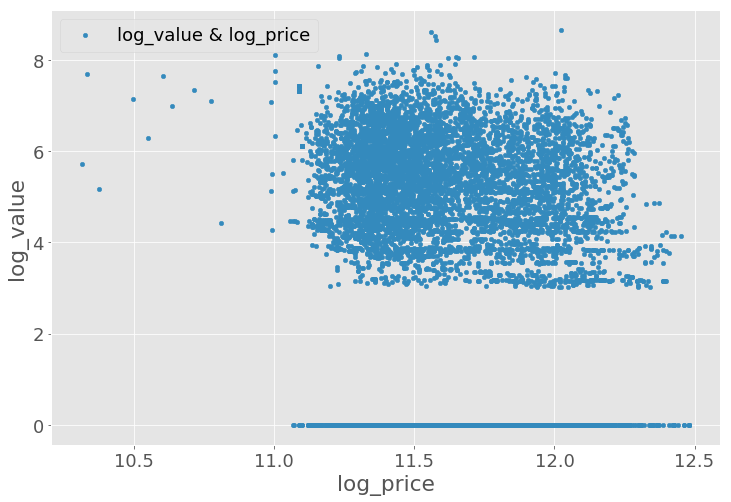

In [145]:
df[['log_price', 'log_value']].plot(kind='scatter', x='log_price', y='log_value', label="log_value & log_price")

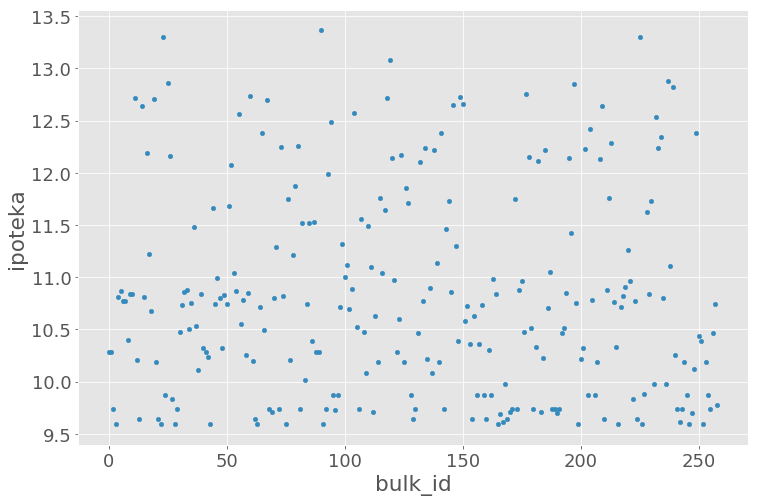

In [146]:
df[['ipoteka', 'bulk_id']].groupby('bulk_id').mean().reset_index().plot(kind='scatter', x='bulk_id', y='ipoteka')